# Tracks of synthetic tropical storms

In [6]:
import geopandas as gpd
import pandas as pd
import numpy as np
import xarray as xr
import folium
import cartopy
import sys
from pathlib import Path

# Make the ../scripts directory importable from the notebook's working directory,
# then import the hurricanes module. Relative imports like "from ../" are invalid syntax.
script_dir = Path("../scripts").resolve()
if not script_dir.exists():
    raise FileNotFoundError(f"scripts directory not found: {script_dir}")
sys.path.insert(0, str(script_dir))

from hurricanes import *

<Axes: >

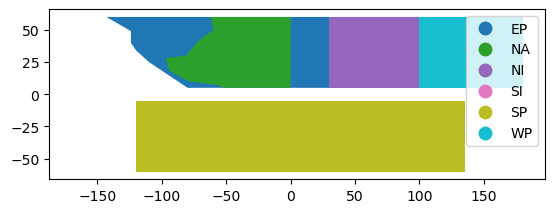

In [7]:
bassins = gpd.read_file("../data/processed/12706085/Basins of STORM IBTrACS dataset.kml")
bassins.plot("Name", legend=True)

In [8]:
center = bassins.geometry.iloc[0].centroid.coords[:][0][::-1]
m = folium.Map(location=center, zoom_start=2)

def style_function(feature):
    return {
        "fillColor": "#3186cc",
        "color": "black",
        "weight": 1,
        "fillOpacity": 0.4,
    }

folium.GeoJson(
    bassins,
    name="Bassins",
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(fields=["Name"], aliases=["Bassin :"]),
    popup=folium.GeoJsonPopup(fields=["Name"])
).add_to(m)

m


### Tracks of cyclones

In [9]:
names = ['Year', 'Month', 'TC number', 'Time step', 'Bassin ID', 'Latitude', 'Longitude', 'Minimum pressure', 'Maximum wind speed', 'Radius to maximum winds', 'Category', 'Landfall', 'Distance to land']

tracks = pd.read_csv("../data/processed/12706085/VERSIE4/STORM_DATA_IBTRACS_NA_1000_YEARS_0.txt",  names=names)
tracks.head(50)

,Year,Month,TC number,Time step,Bassin ID,Latitude,Longitude,Minimum pressure,Maximum wind speed,Radius to maximum winds,Category,Landfall,Distance to land
0,0.0,10.0,0.0,0.0,1.0,8.9,314.8,993.946699,20.371998,46.299999,0.0,0.0,851.946656
1,0.0,10.0,0.0,1.0,1.0,9.0,314.3,992.800000,21.200000,45.905957,0.0,0.0,815.967429
2,0.0,10.0,0.0,2.0,1.0,9.1,313.6,992.100000,21.700000,45.511914,0.0,0.0,766.103506
3,0.0,10.0,0.0,3.0,1.0,9.2,312.7,993.000000,21.100000,45.117872,0.0,0.0,705.759651
4,0.0,10.0,0.0,4.0,1.0,9.3,311.7,993.100000,20.900000,44.723829,0.0,0.0,647.548285
5,0.0,10.0,0.0,5.0,1.0,9.5,310.7,992.700000,21.200000,44.329787,0.0,0.0,605.239404
6,0.0,10.0,0.0,6.0,1.0,9.7,309.6,993.300000,20.800000,43.935744,0.0,0.0,555.779467
7,0.0,10.0,0.0,7.0,1.0,9.9,308.5,993.900000,20.300000,43.541702,0.0,0.0,526.198018
8,0.0,10.0,0.0,8.0,1.0,10.1,307.4,994.000000,20.200000,43.147659,0.0,0.0,499.451982
9,0.0,10.0,0.0,9.0,1.0,10.3,306.3,994.100000,20.100000,42.753617,0.0,0.0,491.536714


In [11]:
from shapely.geometry import Point, Polygon

# Caribbean polygon in 0-360 longitude representation (approx. -90 .. -45 => 270 .. 315)
martinique_poly = Polygon([
    (270.0, 5.0),
    (270.0, 25.0),
    (315.0, 25.0),
    (315.0, 5.0),
    (270.0, 5.0),
])

# 3) Run the test
df_result = filter_track_in_geometry(tracks, martinique_poly)
df_result


C:\Users\ggenelot\Nouveau dossier\modele_SIG\scripts\hurricanes.py:35: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('_hurricane_id', group_keys=False).apply(check_hurricane)


,Year,Month,TC number,Time step,Bassin ID,Latitude,Longitude,Minimum pressure,Maximum wind speed,Radius to maximum winds,Category,Landfall,Distance to land
0,0.0,10.0,0.0,0.0,1.0,8.9,314.8,993.946699,20.371998,46.299999,0.0,0.0,851.946656
1,0.0,10.0,0.0,1.0,1.0,9.0,314.3,992.800000,21.200000,45.905957,0.0,0.0,815.967429
2,0.0,10.0,0.0,2.0,1.0,9.1,313.6,992.100000,21.700000,45.511914,0.0,0.0,766.103506
3,0.0,10.0,0.0,3.0,1.0,9.2,312.7,993.000000,21.100000,45.117872,0.0,0.0,705.759651
4,0.0,10.0,0.0,4.0,1.0,9.3,311.7,993.100000,20.900000,44.723829,0.0,0.0,647.548285
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337074,999.0,8.0,13.0,3.0,1.0,24.8,271.5,990.300000,23.600000,92.599998,0.0,0.0,354.551796
337075,999.0,8.0,13.0,4.0,1.0,25.4,270.8,992.000000,22.400000,92.599998,0.0,0.0,391.816444
337076,999.0,8.0,13.0,5.0,1.0,26.1,270.1,990.000000,23.900000,92.599998,0.0,0.0,317.926065
337077,999.0,8.0,13.0,6.0,1.0,26.8,269.4,994.600000,20.600000,92.599998,0.0,0.0,249.464190


In [12]:
df_filtered_4 = filter_track(df_result, 'Category', lambda x: x>4)
df_filtered_4

C:\Users\ggenelot\Nouveau dossier\modele_SIG\scripts\hurricanes.py:64: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df = df.groupby('_hurricane_id', group_keys=False).apply(check_hurricane)


,Year,Month,TC number,Time step,Bassin ID,Latitude,Longitude,Minimum pressure,Maximum wind speed,Radius to maximum winds,Category,Landfall,Distance to land
247,0.0,8.0,6.0,0.0,1.0,19.6,277.1,996.409177,18.108442,37.040001,0.0,0.0,166.274539
248,0.0,8.0,6.0,1.0,1.0,19.4,277.2,995.700000,18.700000,37.040001,0.0,0.0,153.321208
249,0.0,8.0,6.0,2.0,1.0,19.3,277.3,991.700000,21.600000,37.040001,0.0,0.0,142.409281
250,0.0,8.0,6.0,3.0,1.0,19.2,277.2,992.100000,21.300000,37.040001,0.0,0.0,154.486981
251,0.0,8.0,6.0,4.0,1.0,19.1,277.2,993.300000,20.400000,37.040001,0.0,0.0,156.255214
...,...,...,...,...,...,...,...,...,...,...,...,...,...
337066,999.0,9.0,12.0,35.0,1.0,31.8,277.4,951.600000,47.272062,32.410001,3.0,1.0,0.000000
337067,999.0,9.0,12.0,36.0,1.0,32.2,277.0,970.500000,36.764491,38.197501,1.0,1.0,0.000000
337068,999.0,9.0,12.0,37.0,1.0,32.5,276.8,985.500000,27.438965,43.985001,0.0,1.0,0.000000
337069,999.0,9.0,12.0,38.0,1.0,32.8,276.7,996.500000,19.758938,49.772501,0.0,1.0,0.000000


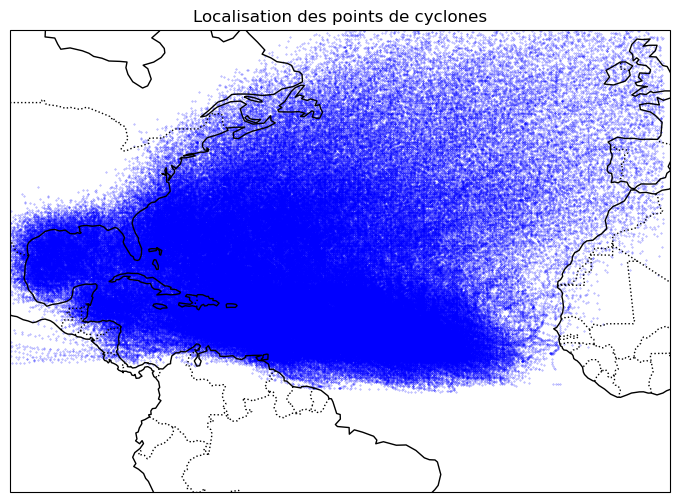

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Ajout des éléments de carte
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-100, 0, -10, 60], crs=ccrs.PlateCarree())

# Points
ax.scatter(tracks["Longitude"], tracks["Latitude"], 
           s=0.1, color="blue", alpha=0.5, transform=ccrs.PlateCarree())

plt.title("Localisation des points de cyclones")
plt.show()


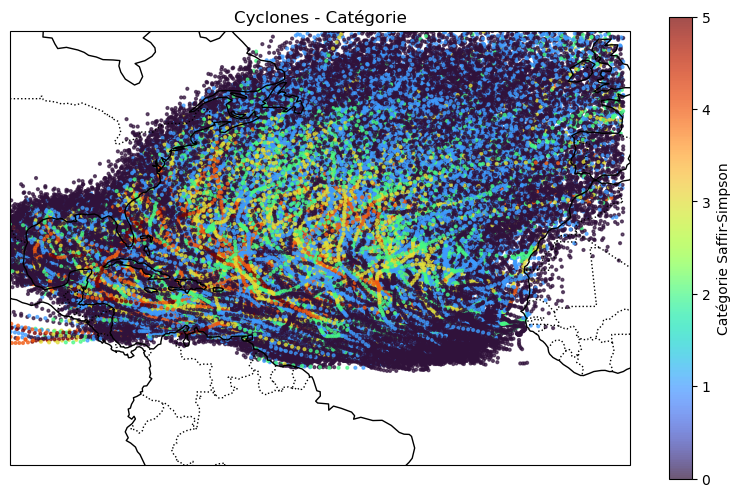

In [14]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-100, 0, -10, 60], crs=ccrs.PlateCarree())

scatter = ax.scatter(tracks["Longitude"], tracks["Latitude"],
                     c=tracks["Category"], cmap="turbo",
                     s=4, alpha=0.7,
                     transform=ccrs.PlateCarree())

plt.colorbar(scatter, ax=ax, label="Catégorie Saffir-Simpson")
plt.title("Cyclones - Catégorie")
plt.show()


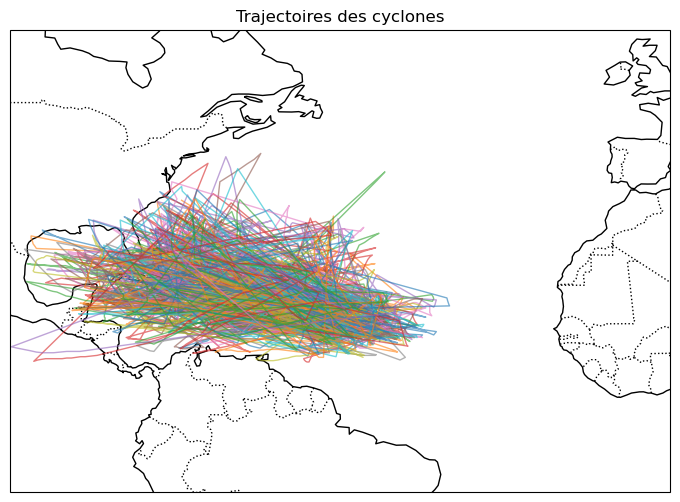

In [15]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

ax.set_extent([-100, 0, -10, 60], crs=ccrs.PlateCarree())

major_tracks = tracks[tracks["Category"]==5]

# Tracer les trajectoires
for cid, track in major_tracks.groupby("TC number"):
    ax.plot(track["Longitude"], track["Latitude"],
            transform=ccrs.PlateCarree(),
            linewidth=1, alpha=0.6)

plt.title("Trajectoires des cyclones")
plt.show()


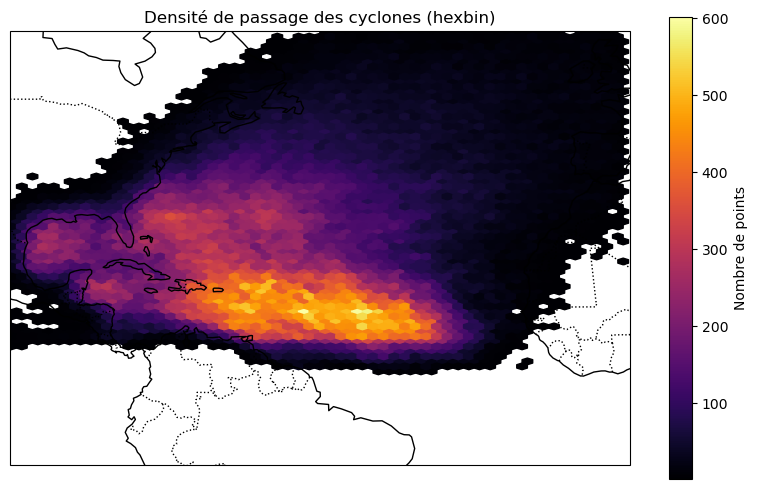

In [16]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Base map
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-100, 0, -10, 60], crs=ccrs.PlateCarree())

# Hexbin
hb = ax.hexbin(tracks["Longitude"], tracks["Latitude"],
               gridsize=60,
               cmap="inferno", 
               mincnt=1,
               transform=ccrs.PlateCarree())

plt.colorbar(hb, ax=ax, label="Nombre de points")
plt.title("Densité de passage des cyclones (hexbin)")
plt.show()


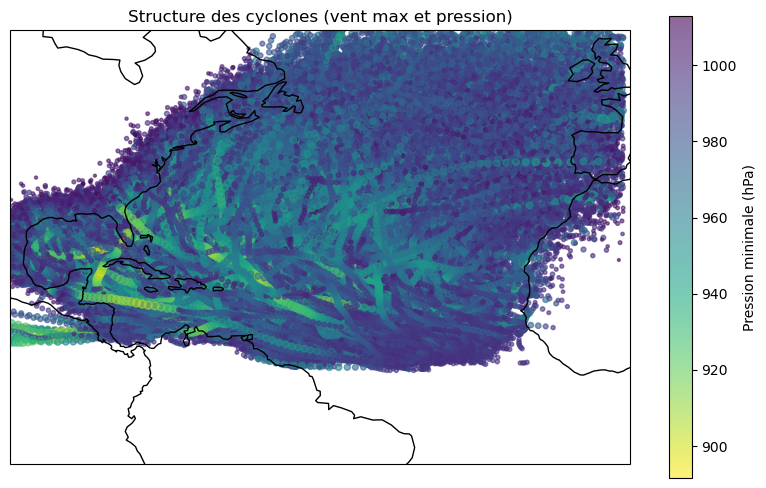

In [17]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.COASTLINE)
ax.set_extent([-100, 0, -10, 60], crs=ccrs.PlateCarree())

sc = ax.scatter(tracks["Longitude"], tracks["Latitude"],
                s=tracks["Maximum wind speed"]*0.5,
                c=tracks["Minimum pressure"],
                cmap="viridis_r",
                alpha=0.6,
                transform=ccrs.PlateCarree())

plt.colorbar(sc, ax=ax, label="Pression minimale (hPa)")
plt.title("Structure des cyclones (vent max et pression)")
plt.show()


## Zooming on martinique

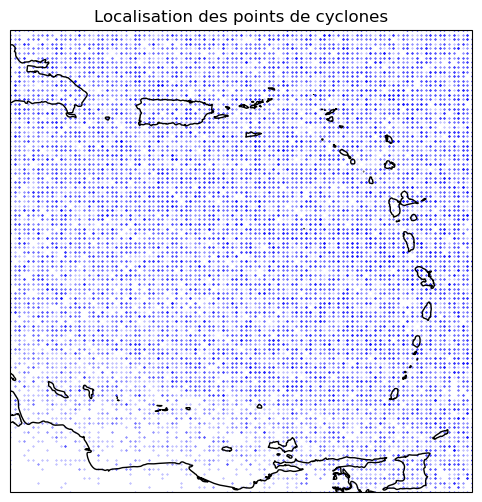

In [18]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Ajout des éléments de carte
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-70, -60, 10, 20], crs=ccrs.PlateCarree())

# Points
ax.scatter(tracks["Longitude"], tracks["Latitude"], 
           s=0.1, color="blue", alpha=0.5, transform=ccrs.PlateCarree())

plt.title("Localisation des points de cyclones")
plt.show()

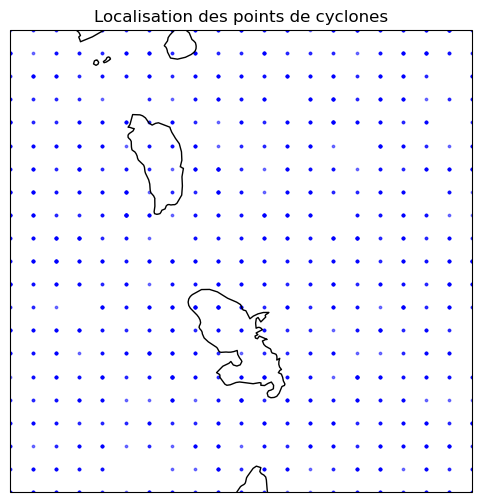

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Ajout des éléments de carte
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-62, -60, 14, 16], crs=ccrs.PlateCarree())

# Points
ax.scatter(tracks["Longitude"], tracks["Latitude"], 
           s=3, color="blue", alpha=0.5, transform=ccrs.PlateCarree())

plt.title("Localisation des points de cyclones")
plt.show()

Only cat 5 cyclones of the last 100 years

In [20]:
cat5_100years = tracks[(tracks["Category"]==5) & (tracks["Year"]<=100)]
cat5_100years

,Year,Month,TC number,Time step,Bassin ID,Latitude,Longitude,Minimum pressure,Maximum wind speed,Radius to maximum winds,Category,Landfall,Distance to land,_hurricane_id
274,0.0,8.0,6.0,27.0,1.0,23.0,271.4,925.2,61.9,37.040001,5.0,0.0,160.486952,6.0_0.0
275,0.0,8.0,6.0,28.0,1.0,23.6,271.0,923.1,63.1,37.040001,5.0,0.0,234.407589,6.0_0.0
276,0.0,8.0,6.0,29.0,1.0,24.2,270.5,918.7,65.4,37.040001,5.0,0.0,312.908643,6.0_0.0
277,0.0,8.0,6.0,30.0,1.0,24.7,270.1,913.5,68.1,37.040001,5.0,0.0,378.223689,6.0_0.0
278,0.0,8.0,6.0,31.0,1.0,25.2,269.7,911.1,69.4,37.040001,5.0,0.0,424.876596,6.0_0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34691,100.0,9.0,4.0,24.0,1.0,14.5,316.7,916.4,63.9,18.520000,5.0,0.0,1442.930423,4.0_100.0
34692,100.0,9.0,4.0,25.0,1.0,14.7,316.6,919.8,62.4,19.016072,5.0,0.0,1453.344032,4.0_100.0
34712,100.0,9.0,4.0,45.0,1.0,17.3,314.6,921.0,62.2,28.937500,5.0,0.0,1565.449787,4.0_100.0
34713,100.0,9.0,4.0,46.0,1.0,17.4,314.6,919.4,63.0,29.433571,5.0,0.0,1574.918184,4.0_100.0


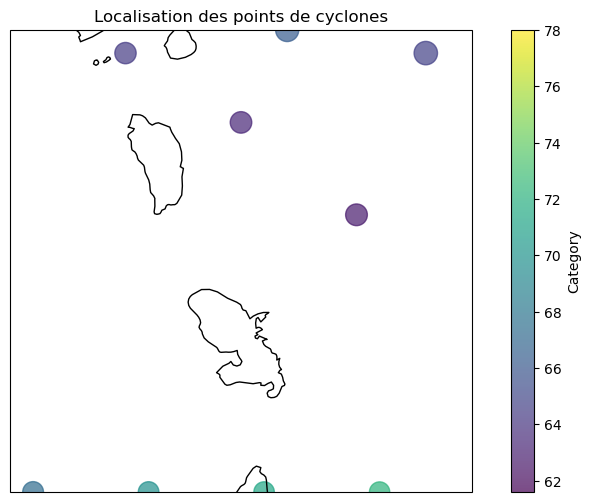

In [21]:
# Use existing imports and existing variable `cat5_100years` if present.
# If not present (e.g. cell run order changed), create the expected selection.
if 'cat5_100years' not in globals():
    cat5_100years = tracks[(tracks["Category"]==5) & (tracks["Year"]<=100)]

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Ajout des éléments de carte
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-62, -60, 14, 16], crs=ccrs.PlateCarree())

# Points: matplotlib scatter doesn't accept "hue" -> use "c" and a colormap instead
sc = ax.scatter(cat5_100years["Longitude"], cat5_100years["Latitude"], 
                s=cat5_100years["Radius to maximum winds"]*10, c=cat5_100years["Maximum wind speed"], cmap='viridis',
                alpha=0.7, transform=ccrs.PlateCarree())

plt.colorbar(sc, ax=ax, label="Category")
plt.title("Localisation des points de cyclones")
plt.show()

C:\Users\ggenelot\AppData\Local\Temp\ipykernel_34564\1125304465.py:22: UserWarning: Adding colorbar to a different Figure <Figure size 1000x600 with 2 Axes> than <Figure size 1000x600 with 2 Axes> which fig.colorbar is called on.
  plt.colorbar(sc, ax=ax, label="Category")


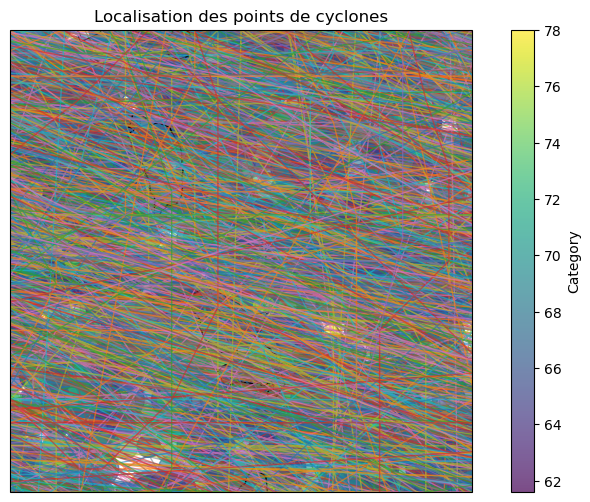

In [22]:
#tracks = tracks[(tracks["Category"]==5)  & (tracks["Year"]<100)]

fig = plt.figure(figsize=(10,6))
ax = plt.axes(projection=ccrs.PlateCarree())

# Ajout des éléments de carte
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_extent([-62, -60, 14, 16], crs=ccrs.PlateCarree())


# Tracer les trajectoires
for cid, track in tracks.groupby("TC number"):
    ax.plot(track["Longitude"], track["Latitude"],
            transform=ccrs.PlateCarree(),
            linewidth=1, alpha=0.6)
    ax.scatter(track["Longitude"], track["Latitude"],
               s=track["Radius to maximum winds"]*10, c=track["Maximum wind speed"], cmap='viridis',  transform=ccrs.PlateCarree(),
            linewidth=1, alpha=0.6)


plt.colorbar(sc, ax=ax, label="Category")
plt.title("Localisation des points de cyclones")
plt.show()

## 

## Let's try to turn the data into xarray

To do so, we'll make a few assumptions : 

- the wind is at the maximum value in the radius of maximum winds
- it is equal to zero in the rest of the place
- we don't care about wind direction, only about wind speed

Let's start by working on a random tropical cyclone. We'll subset our map and our data to our area of interest later.

In [23]:
track = tracks[(tracks["TC number"]==0) & (tracks['Year']==0)]
track.head(25)

,Year,Month,TC number,Time step,Bassin ID,Latitude,Longitude,Minimum pressure,Maximum wind speed,Radius to maximum winds,Category,Landfall,Distance to land,_hurricane_id
0,0.0,10.0,0.0,0.0,1.0,8.9,314.8,993.946699,20.371998,46.299999,0.0,0.0,851.946656,0.0_0.0
1,0.0,10.0,0.0,1.0,1.0,9.0,314.3,992.800000,21.200000,45.905957,0.0,0.0,815.967429,0.0_0.0
2,0.0,10.0,0.0,2.0,1.0,9.1,313.6,992.100000,21.700000,45.511914,0.0,0.0,766.103506,0.0_0.0
3,0.0,10.0,0.0,3.0,1.0,9.2,312.7,993.000000,21.100000,45.117872,0.0,0.0,705.759651,0.0_0.0
4,0.0,10.0,0.0,4.0,1.0,9.3,311.7,993.100000,20.900000,44.723829,0.0,0.0,647.548285,0.0_0.0
5,0.0,10.0,0.0,5.0,1.0,9.5,310.7,992.700000,21.200000,44.329787,0.0,0.0,605.239404,0.0_0.0
6,0.0,10.0,0.0,6.0,1.0,9.7,309.6,993.300000,20.800000,43.935744,0.0,0.0,555.779467,0.0_0.0
7,0.0,10.0,0.0,7.0,1.0,9.9,308.5,993.900000,20.300000,43.541702,0.0,0.0,526.198018,0.0_0.0
8,0.0,10.0,0.0,8.0,1.0,10.1,307.4,994.000000,20.200000,43.147659,0.0,0.0,499.451982,0.0_0.0
9,0.0,10.0,0.0,9.0,1.0,10.3,306.3,994.100000,20.100000,42.753617,0.0,0.0,491.536714,0.0_0.0


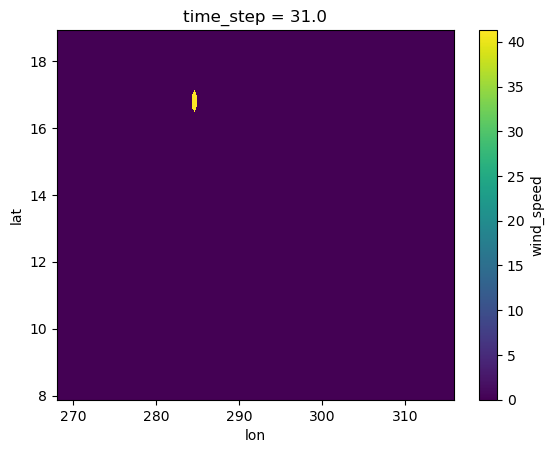

In [24]:
ds = track_to_ds(track)
ds.wind_speed.sel(time_step=31).plot()

## New visualisation

In [ ]:
# In a setup cell
%matplotlib inline
import pandas as pd
import geopandas as gpd

from src.visualisation import (
    tracks_to_points_gdf,
    tracks_to_lines_gdf,
    plot_tracks,
    plot_track_points,
)

# Optional: quick world basemap
#world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


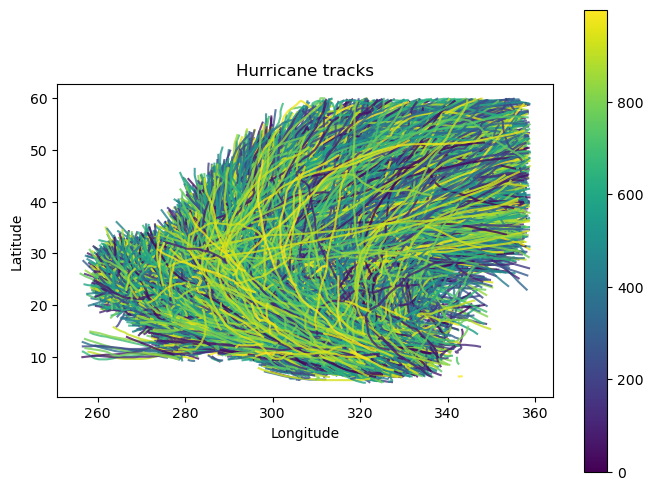

In [26]:
# Assuming you already have a tracks DataFrame `df`
# Columns expected: Latitude, Longitude, TC number, Year, optionally Time step/intensity
# Example: df = pd.read_csv("../data/processed/tracks.csv")

lines = tracks_to_lines_gdf(tracks)          # one LineString per storm
ax = plot_tracks(lines, color_by="Year")  # color by Year (or any column)


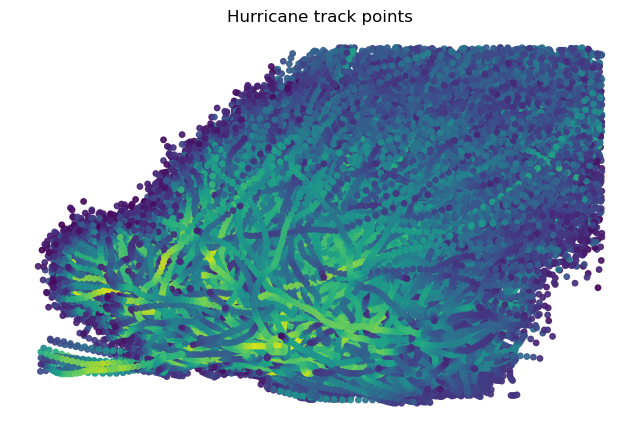

In [27]:
# Plot points (e.g., colored by maximum wind speed or time step)
points = tracks_to_points_gdf(tracks)
ax = plot_track_points(points, color_by="Maximum wind speed", markersize=15)


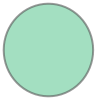

In [ ]:
from src.hurricanes import polygon_from_point_radius
poly = polygon_from_point_radius(15.0, -60.0, radius_km=50)
poly


In [ ]:
from src.hurricanes import polygon_from_point_radius
from shapely.geometry import Polygon
from src.hurricanes import filter_track_in_geometry, filter_track

poly = polygon_from_point_radius(15.0, -60.0, radius_km=1000)


#poly_2 = Polygon([(0, 0), (0, 20), (60, 20), (60, 0)])  # or any other geometry

# Tiny box to make the filter strict
poly_2 = Polygon([
    (-63.0, 14.5),
    (-63.0, 15.5),
    (-62.0, 15.5),
    (-62.0, 14.5),
])


df_filtered = filter_track_in_geometry(tracks, poly)
df_filtered_2 = filter_track(df_filtered, 'Category', lambda x: x>2)

# Plot points (e.g., colored by maximum wind speed or time step)
points = tracks_to_points_gdf(df_filtered)
ax = plot_track_points(points, color_by="Maximum wind speed", markersize=15)


NameError: name 'tracks' is not defined

In [3]:
type(poly)

shapely.geometry.polygon.Polygon

In [43]:
df_filtered

,Year,Month,TC number,Time step,Bassin ID,Latitude,Longitude,Minimum pressure,Maximum wind speed,Radius to maximum winds,Category,Landfall,Distance to land,_hurricane_id
